<a href="https://colab.research.google.com/github/Rami-RK/Gesture_Recognition_Soli_Radar_Data/blob/main/Soli_Data_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing  required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D,BatchNormalization,Activation, Dropout,MaxPooling2D,Reshape
from keras.optimizers import RMSprop

In [11]:
x_train=np.load('/content/drive/MyDrive/Soli_data/data.npy')
y=np.load('/content/drive/MyDrive/Soli_data/labels.npy')

In [12]:
x_train.shape

(2750, 20, 32, 32, 4)

In [13]:
y_train=y[:,0]

In [14]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.5)

In [15]:
#One Hot Encoding
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)


In [16]:
x_train.shape

(1375, 20, 32, 32, 4)

In [17]:
y_train.shape

(1375, 11)

In [18]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
frame=20
num_classes=11

### Model 1

In [20]:
model = Sequential()

model.add(TimeDistributed(Conv2D(32, (3,3), padding='valid', strides=(1,1), activation='relu'),input_shape = (frame,32,32,4)))
model.add(BatchNormalization())
print (model.output_shape)

model.add( TimeDistributed( Conv2D(64, (3,3),padding='valid', strides=(1,1), activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.4))
print(model.output_shape)


model.add( TimeDistributed( Conv2D(128, (3,3),padding='valid', strides=(1,1), activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.4))
print (model.output_shape)


model.add(TimeDistributed(Flatten()))
print (model.output_shape)

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
print (model.output_shape)

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
print (model.output_shape)

model.add(LSTM(units=512,return_sequences=False))
model.add(Dropout(0.5))
print (model.output_shape)

print (model.output_shape)
model.add(Dense(num_classes, activation='softmax'))

(None, 20, 30, 30, 32)
(None, 20, 28, 28, 64)
(None, 20, 26, 26, 128)
(None, 20, 86528)
(None, 20, 512)
(None, 20, 512)
(None, 512)
(None, 512)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 20, 30, 30, 32)    1184      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 30, 30, 32)    128       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 28, 28, 64)    18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 28, 28, 64)    256       
_________________________________________________________________
dropout (Dropout)            (None, 20, 28, 28, 64)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 26, 26, 128)   73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 26, 26, 128)   5

In [22]:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['accuracy'])

In [23]:
batch=32
epoch=100 # it took approx 25 minutes

In [24]:
history=model.fit(x=x_train,y= y_train, batch_size= batch,epochs = epoch,validation_data = (x_val, y_val),verbose = 1)


Epoch 1/100
43/43 [==============================] - 49s 311ms/step - loss: 2.4407 - accuracy: 0.1350 - val_loss: 2.3978 - val_accuracy: 0.0815
Epoch 2/100
43/43 [==============================] - 11s 257ms/step - loss: 2.2205 - accuracy: 0.2368 - val_loss: 2.4081 - val_accuracy: 0.0815
Epoch 3/100
43/43 [==============================] - 11s 257ms/step - loss: 2.0182 - accuracy: 0.3180 - val_loss: 2.4284 - val_accuracy: 0.0815
Epoch 4/100
43/43 [==============================] - 11s 259ms/step - loss: 1.9191 - accuracy: 0.3507 - val_loss: 2.4508 - val_accuracy: 0.1527
Epoch 5/100
43/43 [==============================] - 11s 259ms/step - loss: 1.7695 - accuracy: 0.4205 - val_loss: 2.4697 - val_accuracy: 0.1215
Epoch 6/100
43/43 [==============================] - 11s 260ms/step - loss: 1.6276 - accuracy: 0.4767 - val_loss: 2.4886 - val_accuracy: 0.1382
Epoch 7/100
43/43 [==============================] - 11s 261ms/step - loss: 1.5430 - accuracy: 0.5182 - val_loss: 2.4513 - val_accuracy:

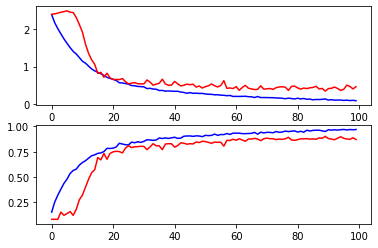

In [25]:
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [26]:
#Making prediction
y_pred=np.argmax(model.predict(x_val),axis=-1)
y_true=np.argmax(y_val,axis=1)

In [27]:
print(y_pred,'\n',y_true)

[10  5  3 ...  2  0  1] 
 [7 5 3 ... 2 0 1]


In [28]:
conf_mx=confusion_matrix(y_true, y_pred)
conf_mx

array([[ 73,   0,  18,  40,   1,   0,   0,   2,   0,   0,   1],
       [  0, 126,   1,   0,   1,   0,   0,   0,   0,   0,   0],
       [  2,   0,  88,  32,   0,   0,   0,   1,   0,   0,   1],
       [  2,   0,   4, 105,   0,   0,   0,   0,   0,   1,   0],
       [  1,   0,   0,   4, 116,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0, 125,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 120,   0,   0,   0,   0],
       [  2,   0,   1,   0,   0,   0,   0, 113,   0,   0,   8],
       [  1,   0,   0,   8,   0,   0,   0,   0, 119,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127,   0],
       [  6,   0,  22,  10,   1,   0,   0,   4,   0,   0,  85]])

In [29]:
## Normalization of confustion Matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

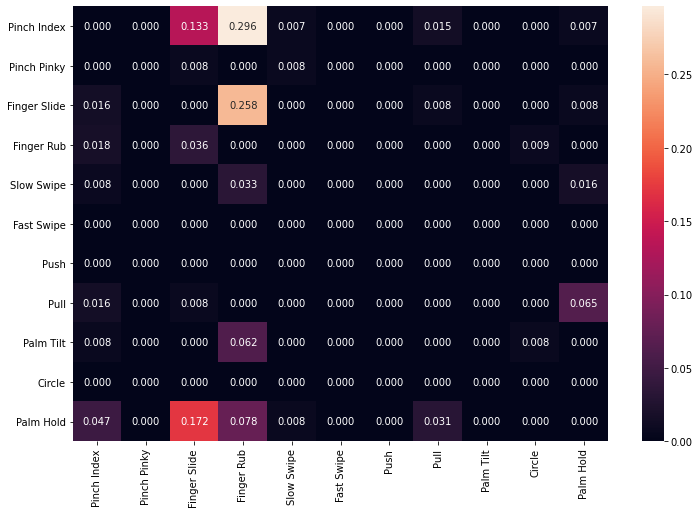

In [30]:
import seaborn as sns
plt.figure(figsize=(12,8))
#Defining the class labels
class_names=['Pinch Index', 'Pinch Pinky', 'Finger Slide', 'Finger Rub', 'Slow Swipe', 'Fast Swipe', 'Push', 'Pull', 'Palm Tilt', 'Circle','Palm Hold']
x_label, y_label=class_names,class_names
sns.heatmap(norm_conf_mx, annot=True, fmt=".3f",xticklabels=x_label, yticklabels=y_label)
plt.show()